# Life Expectancy Estimation

## Goal

The goal of this project is to first analyze the driving factors of life expectancy, and then use machine learning models in order to give an estimate of this feature for a given country.

## Data

The dataset used for this project is the [Life Expectancy Data](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated?select=Life-Expectancy-Data-Updated.csv) from Kaggle, collected by the World Health Organization. It contains 22 features for 193 countries, for a period between 2000 and 2015.  
We have downloaded the `.csv` file and put it in the `data` folder.

## Analysis

These are some important questions we need to discover:
- What are the variables affecting life expectancy?
- What is relationship between infant and adult mortality and life expectancy?
- Is there a positive or negative correlation between life expectancy and drinking habits?
- What is the impact of schooling on the lifespan of humans?
- Do densely populated countries tend to have a lower life expectancy?
- What is the relationship between life expectancy and Immunization coverage?

And much more...

## Import Libraries and Load Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
# load data
df = pd.read_csv('../data/life_expectancy.csv')

In [4]:
# inspect data
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
# inspect the shape and the columns
df.shape, df.columns

((2864, 21),
 Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
        'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
        'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
        'Population_mln', 'Thinness_ten_nineteen_years',
        'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
        'Economy_status_Developing', 'Life_expectancy'],
       dtype='object'))

In [6]:
# change column names to lower case
df.columns = df.columns.str.lower()

In [7]:
# change some columns labels for simplicity
df.rename(columns={
    'adult_mortality': 'adult_deaths',
    'alcohol_consumption': 'alcohol',
}, inplace=True)

We see that the two columns economy_status_developed and economy_status_developing are redundant, let's create a new column called status, and drop the two others.

In [8]:
# create status column
df['status'] = df['economy_status_developed'].apply(lambda x: 'developed' if x==1 else 'developing')
df.drop(['economy_status_developed', 'economy_status_developing'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2864 non-null   object 
 1   region                       2864 non-null   object 
 2   year                         2864 non-null   int64  
 3   infant_deaths                2864 non-null   float64
 4   under_five_deaths            2864 non-null   float64
 5   adult_deaths                 2864 non-null   float64
 6   alcohol                      2864 non-null   float64
 7   hepatitis_b                  2864 non-null   int64  
 8   measles                      2864 non-null   int64  
 9   bmi                          2864 non-null   float64
 10  polio                        2864 non-null   int64  
 11  diphtheria                   2864 non-null   int64  
 12  incidents_hiv                2864 non-null   float64
 13  gdp_per_capita    

Right now, we have 20 features:

- The target feature which is `life_expectancy`
- `country`, `region` and `status` which are categorical features
- The 16 others are numerical features

We also see that there are no missing values in the dataset, which is great.

In [14]:
# look at the missing values
df.isna().sum()

country                        0
region                         0
year                           0
infant_deaths                  0
under_five_deaths              0
adult_deaths                   0
alcohol                        0
hepatitis_b                    0
measles                        0
bmi                            0
polio                          0
diphtheria                     0
incidents_hiv                  0
gdp_per_capita                 0
population_mln                 0
thinness_ten_nineteen_years    0
thinness_five_nine_years       0
schooling                      0
life_expectancy                0
status                         0
dtype: int64

## Explore and Explain Data

In this section, we will to answer the questions we have asked in the introduction of the notebook, so that the model building process can be more efficient.

Our dataset contains data for 179 countries, these countries are distributed across 9 regions.  
For each country, there are 16 records, one for each year between 2000 and 2015.

In [12]:
df[['country']].value_counts(), df[['region']].value_counts()

(country    
 Afghanistan    16
 Rwanda         16
 Nepal          16
 Netherlands    16
 New Zealand    16
                ..
 Georgia        16
 Germany        16
 Ghana          16
 Greece         16
 Zimbabwe       16
 Length: 179, dtype: int64,
 region                       
 Africa                           816
 Asia                             432
 European Union                   432
 Central America and Caribbean    304
 Rest of Europe                   240
 Middle East                      224
 South America                    192
 Oceania                          176
 North America                     48
 dtype: int64)

Let's start our exploration journey with a global view.

- We see that for life expectancy is increasing over the years, it follows a straight line, starting from around 62 years at 2000 to reach 72 years at 2015.  
- Concering GDP per capita, meaning the average annual income of a person in a country, we see that it is also increasing over the years, notice the drop in 2008, this is due to the financial crisis.

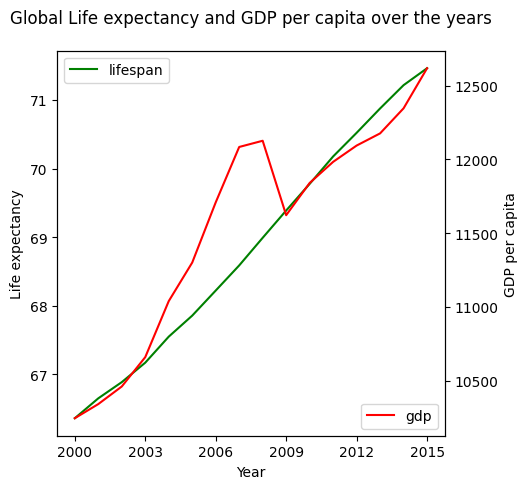

In [51]:
# the global evolution of life expectancy on the left axis and GDP on the right axis over the years
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df.groupby('year')['life_expectancy'].mean(), color='green', label='lifespan')
ax2.plot(df.groupby('year')['gdp_per_capita'].mean(), color='red', label='gdp')
ax1.set_xticks([i for i in range(2000, 2016, 3)])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life expectancy')
ax1.legend(loc='upper left')
ax2.set_ylabel('GDP per capita')
ax2.legend(loc='lower right')
plt.title('Global Life expectancy and GDP per capita over the years', y=1.05)
plt.show()


In [10]:
df.head()

,country,region,year,infant_deaths,under_five_deaths,adult_deaths,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,life_expectancy,status
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5,developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8,developed
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4,developing
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0,developing
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7,developed
